# <p style="text-align:center">Métodos de Regionalización Supervisada</p>

### El principal objetivo de los Métodos de Regionalización es <span style="color:red">agregar un conjunto de areas dentro de un número de regiones espacialmente contiguas mientras se optimiza cierto criterio de agregación</span>. Hay 2 formas en las que se puede agregar: una predefinida normativa/oficialmente o historicamente, y otra en la que son convencionalmente relacionados al fenomeno de estudio (por ejemplo la geographia, homogeneidad socio-economica, economias regionales, etc.).

<img src="regiones_antioquia_normativa.png" alt="Estructura Carpeta" width="300" height="300" align="left">
<img src="regiones_antioquia_funcional.png" alt="Estructura Carpeta" width="300" height="300" align="right">


### Pero el uso de regiones normativas pueden estar fuertemente afectada por problemas de agregación, tales como Falacia Ecologica (Robinson 1950) o Sesgo de agregación (Fotheringham), y los Problemas de la Unidad Espacial Modificable (Openshaw 1977a). 
El sesgo de agregación es cuando se agrega espacialmente, lo que se agrega es resumido en un solo dato (por ejemplo el promedio), entonces cada vez que se agrega, se pierde información de la población al obtener medidas más resumidas. El sesgo de agregación busca medir el daño que se hace con los datos cuando se agregan. La Unidad Espacial Modificable es un fenomeno de  entorno multivariado, en donde los resultados que yo haga de un analisis númerico de variables (sea una regresion o una correlacion),estos resultados van  a cambiar (los coeficientes de la regresion, la correlación) si se cambia la forma en cómo discretizo el espacio (es decir, cómo lo divido), y esto puede ser de 2 formas: cambiando el tamaño de las regiones o cambiando la forma de las regiones. Los resultados de las variables varian mucho deacuerdo a cómo se formen las regiones. Para tratar de evitar el problema de la Unidad Espacial Modificable se recomienda formar unas unidades espaciales que sean representativas del fenomeno, y que no sean sólo una agregación aleatoria, porque así de aleatorio serán los resultados. Si se hace un estudio a nivel de municipio, nunca pretendas que se van a mantener a nivel de departamento.



### Nos vamos a centrar en los metodos de diseño analitico de regiones. Para este problema de regionalización podemos enumerar las siguientes caracteristicas:

1. Todos los metodos de agregación geografica de areas dentro de un numero predefinido de regiones, mientras optimizamos cierto critero de agregración.
2. Las areas dentro de una region debe ser geograficamente conectada ( la restricción de contigüidad espacial)
3. El numero de regiones debe ser menor o igual que el número de areas
4. Cada area debe estar asignada a uno y solo una region
5. Cada region debe contener almenos una area.

### Estos metodos son supervisados porque asumen un conocimiento previo acerca del proceso de agregación: variables relevantes para la agregación, número de regiones a ser diseñadas, la restricción de contigüidad espacial regional, y la existencia de un criterio de agregación

La taxonomia expuesta acontinuación de los métodos de regionalización esta basada primariamente en la estrategia basada para satifacer la restricción de contigüidad, la cual es la principal particularidad de todos estos métodos incluidos en esta revisión.

### Aquí el reto computacionalmente fuerte es garantizar la restricción de contigüidad espacial. Esta restricción es garantizar que <span style="color:red">las areas dentro de una región tienen que estar conectadas</span>. Este reto es un problema complejo ¿Qué se ha echo en la literatura para resolver este problema?

## 1. Algoritmos sin una restricción de contigüidad espacial explicita

Aqui la restricción de contigüidad espacial es indirectamente satisfecha. Esta condición es usualmente aplicada posteriormente, esto es que, una vez armadas las regiones se verifica la contigüidad. En este caso se tiene que reasignar manualmente las áreas
para que las regiones cumplan la contigüidad espacial


### Regionalización via maximización algoritmos de clusterización convencional

Este es el método de regionalización más simple. En el primer escenario se aplica una partición convencional, o algoritmo de clusterizado jerarquico para agregar areas en términos de un conjunto de variables. En un segundo escenario cada cluster es revisado en terminos de la contigüidad espacial y se dejan solo los clusters que tengan areas conectadas geograficamentes. Pero este segundo escenario requiere ajustes en el número de clusters que son requeridos para obtener el numero de regiones deseadas, lo que en algunos casos no es posible. 

Los clusters en el primer escenario pueden tender a ser contiguas espacialmente si las variables tienen algún patron espacial. Si la variable tiene un patron espacial donde altos estan cerca de altos y bajos de bajos, y corro un algoritmo de cluster no espacial, se esperaria que haya sierta tendencia de aglomeración espacial en los k clusters resultados (diferentes a las p regiones)

La homogeneidad regional es garantizada. Como principal ventaja es que son rápidos y computacionalmente eficiente. La principal desventaja es que necesitan mucho postprocesamiento.

No se impone ninguna restricción de compaccidad regional, pero el algoritmo de clusterización elegido puede determinar la silueta de las regiones. Por ejemplo algoritmos de Centroide y de Ward pueden facilmente identificar patrones espaciales densos o circulares, mientras que algoritmos de vinculo único son utiles para identificar patrones espaciales elongados. 

Algoritmos de clusterizados convencionales como k-means solo permite movimientos de areas que mejoren la solución. Esto puede hacer que el algoritmo converja rapidamente, pero puede facilmente quedar atrapado en soluciones suboptimas

## Regionalización via maximización de la compacidad regional

Esta es otra forma de obtener regiones contiguas espacialmente por forzar las regiones diseñadas a ser tan compactas como sean posibles. Su primer uso se remonta a los 60's (en Weaver & Hess, 1963) donde se adapta formulaciones matematicas para seleccionar un subconjunto de areas para ser centro de regiones (almacenes), a los cuales las otras areas (clientes) son asignadas. El criterio de agregación consiste en maximizar la compaccidad regional por minimizar la suma de los <span style="font-weight:bold">Momentos de Inercia</span> definidos como el producto de la Población por área y la distancia cuadrada desde el centroide de cada area al centro de la región (los centros de las regiones son un párametro dado). Agregan una variable que sea de distancia, que lo que hace es que incentiva al modelo a agregar areas que esten cerca espacialmente, al modelo le toca hacer un balance entre la variable de interes (en este caso la población) y la distancia entre las areas. Cuando se le da más peso a la distancia, el modelo de optimización va a definir regiones muy compactas y circulares debido a que el busca agregar areas con menor distancias entre ellas. Pero el costo de esto es que estas regiones resultantes no me estan capturando el patron espacial que se quiere analizar cómo es la distribución de la variable de interes. La satisfacción de la restricción de contiguidad no siempre es garantizada, por lo que una revisión de resultados es requerida para corregir las desconecciones espaciales. Este modelo exige igualdad poblacinal entre las regiones

<img src="compact.png" alt="Estructura Carpeta" width="400" height="400" align="center">

Este tipo de alternativas no me sirve si lo que se quiere es que los datos me digan la forma de las regiones, no el método. Hace que la contigüidad espacial deje de ser una restricción y entre en el objetivo de la optimización, dandole mucha más importancia.


Hess et al. (1965) hizo una presentación más formal de este método, formulandolo como un módelo de programación entera

Kaiser (1966) propuso un modelo similar pero  involucrando un nuevo componenente de medida de la <span style="font-weight:bold">Compaccidad Geometrica Relativa</span>, donde la silueta de cada región debe ser tan cercana como sea posible a un circulo. Esta compaccidad relativa es calculada como la proporción de momentos de inercia para la región j y el momento de inercia de un circulo con la misma área geometrica. Para una solucción dada, la <span style="font-weight:bold">Compaccidad Global</span> es medida como el promedio de las compaccidades relativas para todas las regiones. Sólo movimientos que mejoren la solucción son permitidos, por lo que hay riesgo de quedar atrapado en óptimos locales. El proceso de iteración finaliza cuando ningun movimiento de mejora es posible. La contiguidad se controla vía pesos de igualdades poblacionales respecto a la compaccidad.

Mills (1967) tiene en cuenta en el algoritmo la inclusión de las <span style="font-weight:bold">barreras naturales</span>, realizando <span style="font-weight:bold">Asignaciones Permanentes</span> de las áreas separadas por la barrera natural a regiones diferentes.

## 2. Algoritmos con una restricción de contigüidad espacial explicita

Los métodos cubiertos en esta sección incluyen entre sus procesos de solución instrumentos adicionales que aseguren la contigüidad espacial de cada región vía algunas restricciones adicionales al módelo que se deben cumplir. Estas restricciones permiten al modelo definir una función objetivo que no tenga que ver con la contigüidad y que se centre más en la variable de intereses con la que se desea agregar. Esto significa que los modelos requieren información acerca de la relacción de vecindad espacial entre las áreas.

## Modelos de Optmización Regional Exactos

La agregación de $n$ areas dentro de $m$ regiones contiguas espacialmente mientras se optmiza un criterio de agregación predefinido no es un problema facil de soluccionar optimamente (Altman 1998). El número de soluciones factibles de un problema de regionalización no solo depende de $n$ y de $m$, sino también de cómo las áreas estan distribuidas en el espacio. Estas dificultades computacionales de las soluciones exactas de los modelos de regionalización se han logrado ir solucionando a medida que hay avances en las capacidades de computo. La capacidad de computo ha hecho que las aplicaciones de estos problemas permanezcan limitados a unos problemas pequeños.

El principal reto de solucionar problemas de regionalización via métodos exactos es encontrar una forma eficiente de incluir la restricción de contigüidad espacial. Zoltner & Sinha (1983) introducen una forma alternativa para definir la contigüidad espacial entre áreas en la que usan la <span style="font-weight:bold">Red de Carreteras y Autopistas</span> para representar cómo las áreas estan interconectadas. Esta definición incluye las barreras naturales debido a que estas determinan el trazado de la malla vial. En esta representación los nodos son las areas y los links son las carreteras que conectan las áreas.

Duque (2004) formulo el problema como un modelo de programación intera mixta. tomando prestado conceptos de la teoría de grafos, representro las relaciones de vecindad en un grafo conectado con nodos representando áreas y links representando la conectividad espacial entre áreas. La agregación de las $n$ areas dentro de las $m$ regiones contiguas puede ser logrado por seleccionar $n-m$ links del grafo conectado. Una condición adicional de facticibilidad impone que cada par de areas que pertenezcan a la misma región debe estar conectada por una y solo una combinación de links, conocida como <span style="font-weight:bold">Restricción de Ruptura de Subtoures</span>. 

Una arbol es una estructura de red que conectada todos los nodos con el minimo número de links y que no tiene subtoures
Se pueden diseñar diferentes arboles que me conecten todos los nodos de un general graph con el menor número de links. Se necesitan n-1 arcos para formar un arbol:

<img src="Tree vs graph.jpg" alt="Estructura Carpeta" width="400" height="400" align="center">

Un subtour es una estructura de red con la cuál yo puedo partir desde un nodo, y recorriendo los links de la red se puede volver al nodo inicial.

<img src="subtour.png" alt="Estructura Carpeta" width="400" height="400" align="center">

Si se genera un subtour de en un lado, se genera una desconexión en otro lado.

Duque, Church y Middleton (2006) formularon tres nuevos modelos para solucionar el problema de regionalización. Las tres formulaciones tienen la misma función objetivo que Duque (2004), pero cada una aplica una estrategia diferente para para satisfacer la restricción de contigüidad espacial, llamados $Tour_{RM}$, $Order_{RM}$, $Flow_{RM}$. $Tour_{RM}$ selecciona $n-m$ links y previene los subtoures adaptando una de las restricciones. $Order_{RM}$ esta basada en la restricción de contigüidad seleccionando una área nucleo por región y asignando las áreas restantes a los nucleos teniendo en cuenta el orden de la relación de contigüidad espacial entre estas áreas. En $Flow_{RM}$ la restricción de contigüidad es satisfecha diseñando una subred conectada representando movimientos fluidos desde multiples fuentes hacia un solo pozo.


## Modelos Heuristicos para Regionalización

Estos modelos han sido ampliamente usados a partir de los 60's y han provado ser altamente efectivos en los casos en los cuales un gran número de áreas van a ser agregadas. El principal objetivo de los modelos heuristicos consiste en <span style="font-weight:bold">encontrar, en un tiempo razonable, una solución tan cercana a la óptima como sea posible</span>, la cual en la mayoria de casos es desconocida. Un componente muy importante de los métodos heuristicos es la habilidad para escapar de optimos locales para lograr una buena solucción. En el contexto de Regionalización, es la habilidad de eficientemente moverse desde una solucción a otra solucción vecina sin violar la restricción de contigüidad espacial. A continuación cuatro tipos de Heuristicos

### Algoritmos de clusterización jerarquica adaptados

El algoritmo de clusterización jerarquica es modificado de tal forma que solo a las regiones (clusters) conectadas espacialmente se les permite ser unidas. La investigación en este tema exploración la utilización de diferentes métodos de clusterización jerarquica aglomerativa (vinculo único, completo, promedio, Ward, entre otros), así como no jerarquicos (K-means). Dos caracteristicas son exploradas en esos métodos: su habilidad para identificar diferentes patrones espaciales y cómo la restricción de contigüidad espacial afecta los dendogramas. Estas aproximaciones pueden ser útiles cuando se esta interesado en soluciones anidadas en diferentes escalas (número de regiones). 

### Regiones Sembradas (Semillas)

Cada región es el resultado de seleccionar una área (área semilla) a las cuales otras áreas vecinas son asignadas. Vickrey en (1961) fue el primer en soluccionar estos problemas, seleccionando una áreas aleatoria de referencia, luego usando la área más retirada geograficamente al área de referencia y agregando áreas no asignadas a sus áreas de referencia vecinas. Este proceso finaliza cuando la región satisface una condición predefinida, una <span style="font-weight:bold">Cuota de Población Minima</span>. Una vez una región este diseñada, se continua con la siguiente, estrategia implementada para evitar la creación de <span style="font-weight:bold">enclaves</span>. Estos métodos presusoponen que el número de regiones es conocidos.

<img src="enclave.png" alt="Estructura Carpeta" width="200" height="200" align="center">

### Modificación de una solucción inicial factible

Estos métodos requieren como una entrada una solución inicial factible la cual es iterativamente modificada mientras se busca mejoras en el criterio de agregación. Cada iteración debe ser factible en términos de la restricción de contigüidad espacial. Propuesto por Nagel (1965) para problemas de redistritizar. Severas condiciones deben ser satisfechas antes de permitir un movimiento: el área que actualmente contiene el área a ser movida debe tener más de un área y no puede perder su contigüidad espacial despues de remover el área. Permite dos movimientos: uno movimiento de área a la vez, y otro de intercambio de áreas una por una entre dos regiones vecinas. El proceso finaliza cuando ningun movimiento de mejora es posible. 

### Modelos Basados en teoria de Grafos

Representa las áreas y sus relaciones de contigüidad como un grafo conectado (G) donde los links entre los nodos/áreas i y j significan que esas dos áreas comparten un borde. Dado un grafo conectado (G), en los cuales un vector de caracteristicas es asociado con cada vertice, encontrando un minimo de partición de inercia del conjunto de los vertices de G dentro de un numero prescrito de clusters conectados. Genera una partición inicial de T por borrar p-1 links donde p es el número de regiones a ser diseñadas

## Modelos Heuristicos mezclados

Bajo esta categoria entran los modelos que combinan heuristicos y modelos de optimización exacata para solucionar los problemas de regionalización. Estos métodos logran mesclar el poder computacional de las aproximaciones heuritistcas con la precisión matematica de los modelos exactos

RASS: Algoritmos de Regionalización con Busqueda Selectiva (Duque, 2004). Este modelo asume alguna evidencia de dependencia espacial y que existan diferencias sustanciales entre los datos lo que justifique el diseño de más de una región. Este algoritmo inicia seleccionando un subconjunto m de regiones vecinas. Las areas pertenecientes a esas regiones son pasadas a un modelo de optimización exacto para reagregarlas dentro de m regiones. La principal ventaja del RASS es tomar ventaja del modelo de optimización al aplicarlo a un conjunto de regiones, en vez de tratar de solucionar el modelo completo de una vez.

Duque & Church (2004) formularon una alternativa adaptando el modelo heuristico conocido como Heuristico de Concentración (Rosing & ReVelle, 1997) 

# ClusterPy

## Algoritmos de cluster implementados en clusterpy:

### AZP, Arisel, pExhaustiveFunctionalRegions, AZPRTabu, AZPSA, AZPTabu, Random, PregionsExact, PregionsExactCP, MinpOrder, MinpFlow, MaxpTabu, AMOEBA, originalSOM, geoSom, geoAssociationCoef, redistributionCoef, similarityCoef

In [5]:
%matplotlib inline
from pandas import *
import pandas as pd
import clusterpy
import geopandas as gpd
import numpy as np
from numpy import median
from multiprocessing import Pool
from sets import Set
import math
import scipy.misc as mpimg
import matplotlib.pyplot as plt
import gc

ClusterPy: Library of spatially constrained clustering algorithms
Some functions are not available, reason: No module named Polygon
Some functions are not available, reason: No module named Polygon


In [196]:
shape = clusterpy.createGrid(5, 5)
shape.generateData("SAR", "rook", 1, 0.7)

In [197]:
shape.fieldNames

['ID', 'SAR1']

In [198]:
shape.cluster('arisel', ['SAR1'], 2, wType='rook', inits=2, dissolve=1)

['SAR1']
['ID', 'SAR1']
Running original Arisel algorithm
Number of areas:  25
Number of regions:  2
INITIAL SOLUTION:  [0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] 
INITIAL OF:  12.7186215911
FINAL SOLUTION:  [0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] 
FINAL OF:  12.7186215911


In [174]:
shape.exportArcData('Output_clase')
c = gpd.GeoDataFrame.from_file('Output_clase.shp')

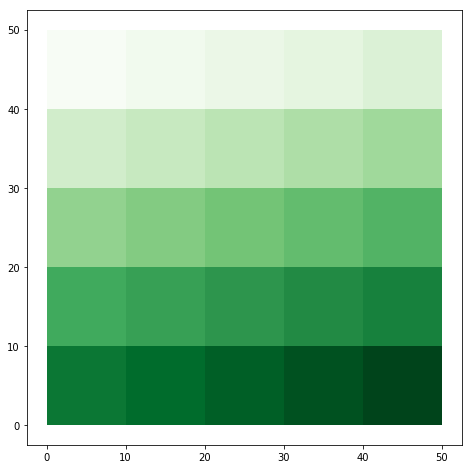

In [199]:
c.plot(linewidth=0.05, figsize=(8,8), cmap='Greens')

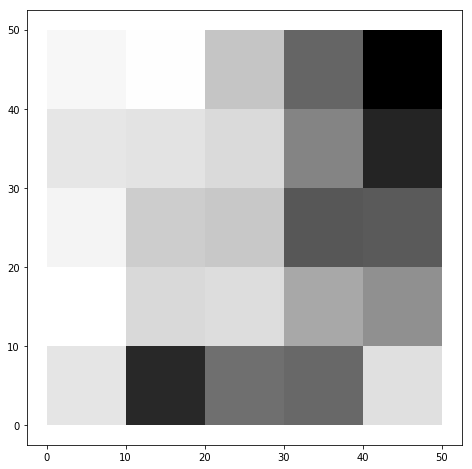

In [200]:
c.plot(column='SAR1', figsize=(8,8),cmap='Greys')

In [204]:
c[["SAR1"]]

,SAR1
0,-2.645769
1,-2.985141
2,-0.975031
3,1.145202
4,3.140376
5,-1.954495
6,-1.839112
7,-1.565187
8,0.434070
9,2.387352


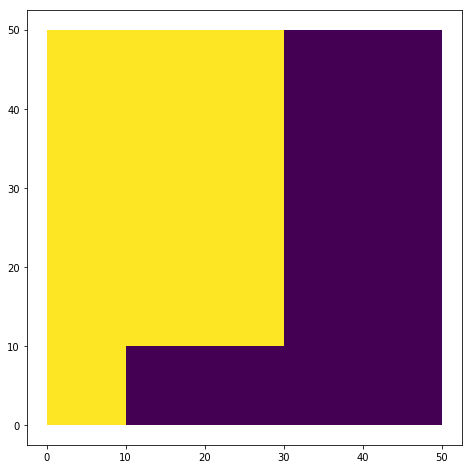

In [203]:
c.plot(column='arisel_2018', linewidth=0.15, figsize=(8,8))


Z = $\displaystyle\sum_{i}\sum_{j|j>i} d_{ij}t_{ij}$    OF

$i,j$ = $\text{indices y conjuntos de areas, i={1,...,m}}$

$c_{ij}$ = $\left\{ \begin{array}{rcl}
 1 & \mbox{si} & \text{area  i y j comparten un borde, con} & \mbox{$i,j \in l$}& \text{y} & \mbox{$i\neq j$} \\
0 & \mbox{si} & e.o.c
\end{array}\right.$

$N_i$ =  {${j | c_{ij}=1}$}

$d_{ij}$ = relación de heterogeneidad entre areas i & j con $\mbox{$i,j \in l$}$ y $i< j$

$c_{ij}$ = $\left\{ \begin{array}{rcl}
 1 & \mbox{si} & \text{area  i y j comparten un borde, con} & \mbox{$i,j \in l$}& \text{y} & \mbox{$i\neq j$} \\
0 & \mbox{si} & e.o.c
\end{array}\right.$

$t_{ij}$ = $\left\{ \begin{array}{rcl}
 1 & \mbox{si} & \text{area  i y j pertenecen a la misma región} \\
0 & \mbox{si} & e.o.c
\end{array}\right.$

$x_{ij}$ = $\left\{ \begin{array}{rcl}
 1 & \mbox{si} & \text{el arco o el vinculo entre areas adyacentes i y j es seleccionado para un grafo de arbol} \\
0 & \mbox{si} & e.o.c
\end{array}\right.$

$u_{i}$ = $\text{order asignado a cada area i en una subred o arbol}$

$\displaystyle\sum_{i=1}^{n}\sum_{j \in N_{i}} x_{ij} = n -p$

$\displaystyle\sum_{j \in N_{i}} x_{ij} \leq 1$ 

$t_{ij} + t_{im} - t_{jm} \leq 1$